## Convolutional neural networks & the MNIST dataset

In [2]:
# Import all useful libraries

import tensorflow as tf
import keras # to implement neural networks
import numpy as np # to work with vectors and tensors
import time # to estimate the execution time of the model 
import matplotlib.pyplot as plt # to make plots 
from matplotlib.ticker import PercentFormatter # to represent percentages on the y-axis of a histogram
from keras.models import Sequential # to define a neural network 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D # to build a neural network

In [3]:
# download the MNIST training and test datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print("# of training data = %s"%(len(x_train))) # how many training data?
print("# of test data = %s"%(len(x_test))) # how many test data?
print("# of classes: %s"%(set(y_test))) # how many classes? 

# of training data = 60000
# of test data = 10000
# of classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Before building the convolutional neural network, we should make sure that we are working with **balanced classes** in both training and test sets. The performance of neural networks is known to be affected by this factor and it is proven to be optimal only in presence of datasets split into equal proportions of classes. Since we have 10 classes, each of them should account for about 10\% of the data. 

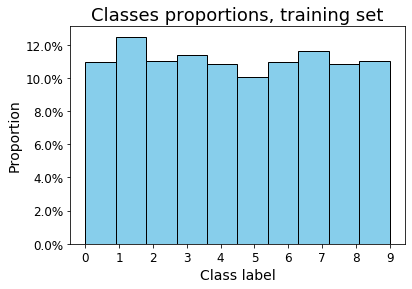

In [5]:
# Histogram to represent the proportion of each class in the training set

num_bins = 10
n, bins, patches = plt.hist(y_train, num_bins, density = 1, color="skyblue",edgecolor="black")
plt.xticks(np.arange(10), fontsize = 12)
plt.yticks(fontsize = 12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Classes proportions, training set", fontsize = 18)
plt.xlabel("Class label", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)

plt.show()

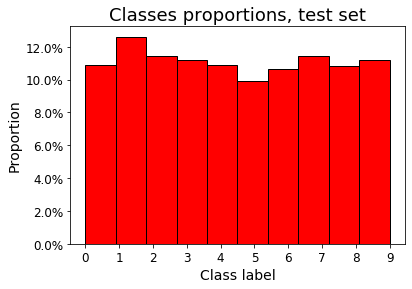

In [6]:
# Histogram to represent the proportion of each class in the test set
n, bins, patches = plt.hist(y_test, num_bins, density = 1, color="red",edgecolor="black")
plt.xticks(np.arange(10), fontsize = 12)
plt.yticks(fontsize = 12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Classes proportions, test set", fontsize = 18)
plt.xlabel("Class label", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)

plt.show()

The index of the 11972 point is:  6


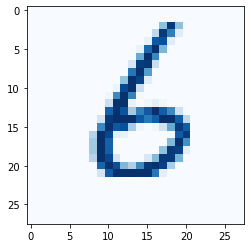

In [7]:
# Represent a training data point randomly chosen as a 2D image
%matplotlib inline
rand_index = np.random.randint(60001,size = 1)[0]
print("The index of the", rand_index, "point is: ", y_train[rand_index])
plt.imshow(x_train[rand_index], cmap = "Blues")
plt.show()

The index of the 4795 point is:  9


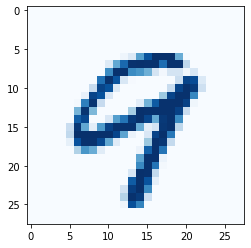

In [8]:
# Represent a test data point randomly chosen as a 2D image
%matplotlib inline
rand_index_1 = np.random.randint(10001,size = 1)[0] 
print("The index of the", rand_index_1, "point is: ", y_test[rand_index_1])
plt.imshow(x_test[rand_index_1], cmap = "Blues")
plt.show()
# We store rand_index_1. We are going to recall it later in order to make a comparison 
# between this data point and its prediction from the model 

In [9]:
# Check the shape of point in both training and test datasets
print("Training data shape = ", x_train.shape)
print("Test data shape = ", x_test.shape)

Training data shape =  (60000, 28, 28)
Test data shape =  (10000, 28, 28)


As we can notice also in the previous plot, each point of the training and of the test dataset is a $28 \times 28$ image. Therefore, the two datasets have a shape of the form (# of data, # of pixels on the $x$-axis, # of pixels on the $y$-axis). 

In [10]:
# Since we aim at building a 2D convolutional neural network, each input should be reshaped
# into a (60000, 28, 28, 1) vector. 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1) # shape of each input data 

x_train = x_train.astype("float32") # converting both training and test data into float numbers
x_test = x_test.astype("float32")

x_train /= 255 
x_test /= 255 # normalization of both training and test data dividing by # 255 = max(RGB code) - min(RGB code)

In [11]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Dropout(0.1)) 
model.add(Conv2D(32, kernel_size = (2,2), input_shape=input_shape))
model.add(Conv2D(28, kernel_size = (2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(180, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

# Two dropout layers to minimize overfitting likelihood 

In [ ]:
# Save model as a .json file

model_json = model.to_json()
with open("mnist_net.json", "w") as json_file:
    json_file.write(model_json)

# Code to load the saved model 
# saved_model = open("mnist_net.json", "r")
# loaded_model = saved_model.read()
# saved_model.close()
# model = model_from_json(loaded_model)

In [12]:
np.random.seed(0)
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, verbose = 0)
print("Accuracy on the training set: ", 100*round(model.evaluate(x_train, y_train)[1],2))
print("Execution time [minutes]: ", round(1/60*(time.time()-start_time),2))



60000/60000 [==============================] - 14s 230us/step
Accuracy on the training set:  99.0
Execution time [minutes]:  10.01


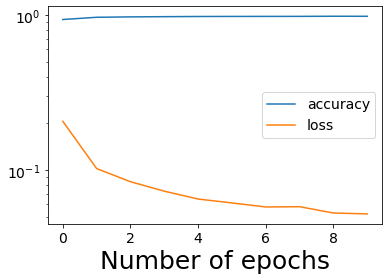

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.xlabel("Number of epochs", fontsize = 25)
plt.yscale("log") # logarithmic scale on both axes
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(["accuracy","loss"], loc = 7, fontsize = 14)
plt.show()

In [14]:
print("Accuracy on the test set:", 100*round(model.evaluate(x_test, y_test)[1],2))

10000/10000 [==============================] - 2s 235us/step
Accuracy on the test set: 98.0


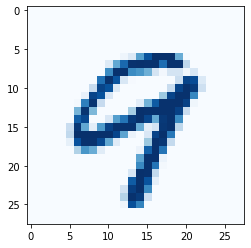

In [15]:
# Gauge predictions on a random test data. Retrieve the test data whose index is rand_index_1 previously saved

%matplotlib inline

plt.imshow(x_test[rand_index_1].reshape(28, 28),cmap="Blues")
pred = model.predict(x_test[rand_index_1].reshape(1, 28, 28, 1))
#print(pred.argmax())
plt.show()

*Credits to: https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d*